In [1]:
import torch
from unityagents import UnityEnvironment
import numpy as np
from agent import *
from model import *

env = UnityEnvironment(file_name='Banana_Linux/Banana.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode = True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
def training(env, agent, episodes = 2000, eps = 1, eps_end = 0.001, max_iter = 2000, print_every = 50, term_reward = 23):
    episodal_reward = []
    averaged_window = deque(maxlen = 10)
    averaged_reward = []
    score_max = 0
    for e in range(episodes):
        r = 0
        counter = 0
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]
        
        ## Limit each eposide to not over 300 iterations
        ## Goal is to reach 25 reward within 300 iterations/steps
        while counter < max_iter:
#             print(counter)
            counter+=1
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0] 
            r += reward
            
            agent.step(state, action, reward, next_state, done)

            if done:
                break
            
            state = next_state
        eps = max(eps*0.995, eps_end)  
        episodal_reward.append(r)
        averaged_window.append(r)
        averaged_reward.append(np.mean(averaged_window))

        ## print every
        if (e+1) % print_every == 0:
            print(f"Episode: {e+1}, max score{np.max(episodal_reward)}, max avg score {np.max(averaged_reward)}\n")
        
        if e>0:
            if r > score_max:
                torch.save(agent.local_qnet.state_dict(), 'model.pt')  
                score_max = r
            if score_max > term_reward:
                print(f"Solved in episode {e+1}, max score {r}\n")
                break
    return episodal_reward, averaged_reward
        
agent =Agent()
 
epi_reward, avg_rward = training(env, agent)
    
        

Episode: 50, max score5.0, max avg score 2.3

Episode: 100, max score6.0, max avg score 3.9

Episode: 150, max score9.0, max avg score 6.1

Episode: 200, max score9.0, max avg score 7.4

Episode: 250, max score13.0, max avg score 8.9

Episode: 300, max score17.0, max avg score 10.5

Episode: 350, max score17.0, max avg score 12.1

Episode: 400, max score17.0, max avg score 12.1

Episode: 450, max score17.0, max avg score 12.1

Episode: 500, max score18.0, max avg score 12.7

Episode: 550, max score21.0, max avg score 14.9

Episode: 600, max score21.0, max avg score 14.9

Episode: 650, max score21.0, max avg score 15.4

Episode: 700, max score21.0, max avg score 15.4

Episode: 750, max score21.0, max avg score 15.4

Episode: 800, max score22.0, max avg score 17.2

Episode: 850, max score22.0, max avg score 17.2

Episode: 900, max score23.0, max avg score 17.2

Episode: 950, max score23.0, max avg score 17.2

Episode: 1000, max score23.0, max avg score 17.2

Episode: 1050, max score23.0,

In [4]:
env.close()

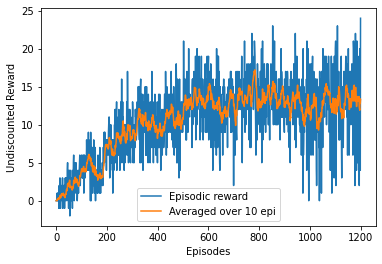

In [6]:
import matplotlib.pyplot as plt
plt.plot(epi_reward, label = 'Episodic reward')
plt.plot(avg_rward, label = 'Averaged over 10 epi')
plt.xlabel("Episodes")
plt.ylabel("Undiscounted Reward")
plt.legend()

In [1]:
## To play with trained agent:
from unityagents import UnityEnvironment
import numpy as np
from agent import *
from model import *

newenv = UnityEnvironment(file_name='Banana_Linux/Banana.x86_64')
brain_name = newenv.brain_names[0]
brain = newenv.brains[brain_name]

env_info = newenv.reset(train_mode = False)[brain_name]

## load trained model:
smartAgent = Agent()
smartAgent.local_qnet.load_state_dict(torch.load('model.pt'))
smartAgent.local_qnet.eval()
state =  env_info.vector_observations[0]
done = False

while not done:
 
    action = smartAgent.act(state, 0.001)
    env_info = newenv.step(action)[brain_name] 
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0] 
    state = next_state

 

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
newenv.close()